Disciplina: Mineração de Dados

Professor: Wilson Castello Branco Neto

Aula 2 - Atividade 1: Salário por país e raça.

Nome: Patriki de Oliveira Góss

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

Dataset: Salary dataset based on country and race

Original em: https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race

Para a atividade baixe o dataset disponível no site da disciplina, pois ele sofreu algumas alterações.

Após ler o dataset implemente as funções solicitadas. Sempre que for solicitada a criação de um gráfico, deve-se gerar duas versões do mesmo gráfico, uma usando o matplotlib e outra usando o seaborn.

Apresente as estatísticas básicas das variáveis quantitativas usando o método describe do dataframe.

In [4]:
df = pd.read_csv('Aula2_At1_Salary_Data_Based_country_and_race.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5118 non-null   float64
 1   Gender               5118 non-null   object 
 2   Education Level      5118 non-null   object 
 3   Job Title            5118 non-null   object 
 4   Years of Experience  5118 non-null   float64
 5   Salary               5118 non-null   float64
 6   Country              5118 non-null   object 
 7   Race                 5118 non-null   object 
dtypes: float64(3), object(5)
memory usage: 320.0+ KB


,Age,Years of Experience,Salary
count,5118.000000,5118.000000,5118.000000
mean,33.929660,8.265631,113722.941579
std,7.703118,6.165074,51858.887848
min,21.000000,0.000000,25000.000000
25%,28.000000,3.000000,68118.000000
50%,32.000000,7.000000,110707.000000
75%,39.000000,12.000000,160000.000000
max,62.000000,34.000000,219000.000000


Calcule das estatísticas básicas do atributo idade (Age) usando as funções do Pandas e compare com as geradas pelo método describe.

In [5]:
quantidade =  df['Age'].count()
print('Quantidade de elementos: ', quantidade)

soma = df['Age'].sum()
print('Soma dos elementos: ', soma)

media = df['Age'].mean()
print('Media dos elementos: ', media)

mediana = df['Age'].median()
print('Mediana dos elementos: ', mediana)

quartil1 = df['Age'].quantile(q=0.25)
print('Quartil 1 dos elementos: ', quartil1)

quartil2 = df['Age'].quantile(q=0.50)
print('Quartil 2 (mediana) dos elementos: ', quartil2)

quartil3 = df['Age'].quantile(q=0.75)
print('Quartil 3 dos elementos: ', quartil3)

moda = df['Age'].mode()
print('Moda dos elementos: ')
for x in moda:
  print(x)

minimo = df['Age'].min()
print('Menor valor: ', minimo)

maximo = df['Age'].max()
print('Maior valor: ', maximo)

var = df['Age'].var()
print('Variância dos elementos: ', var)

dp = df['Age'].std()
print('Desvio padrão dos elementos: ', dp)

cv = dp / media * 100
print('Coeficiente de variação dos elementos: ', cv)

assimetria = df['Age'].skew()
print('Coeficiente de assimetria: ', assimetria)

curtose = df['Age'].kurtosis()
print('Coeficiente de Curtose: ', curtose)

Quantidade de elementos:  5118
Soma dos elementos:  173652.0
Media dos elementos:  33.92966002344666
Mediana dos elementos:  32.0
Quartil 1 dos elementos:  28.0
Quartil 2 (mediana) dos elementos:  32.0
Quartil 3 dos elementos:  39.0
Moda dos elementos: 
27.0
Menor valor:  21.0
Maior valor:  62.0
Variância dos elementos:  59.33802571984381
Desvio padrão dos elementos:  7.70311792197444
Coeficiente de variação dos elementos:  22.70319807699605
Coeficiente de assimetria:  0.861144826439772
Coeficiente de Curtose:  0.10947183333318744


Crie o histograma de frequência para as variáveis Idade (Age) e Salário (Salary), usando a fórmula de Sturges.

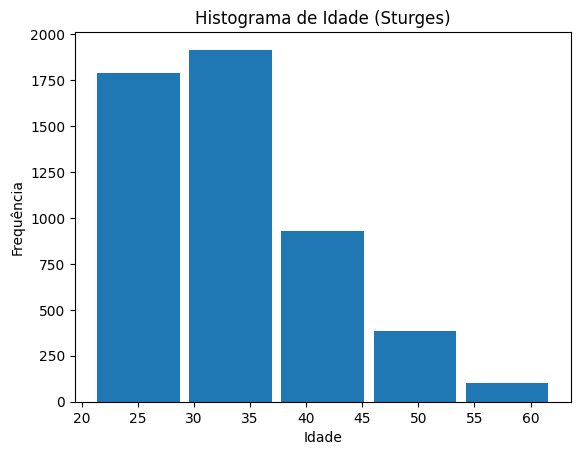

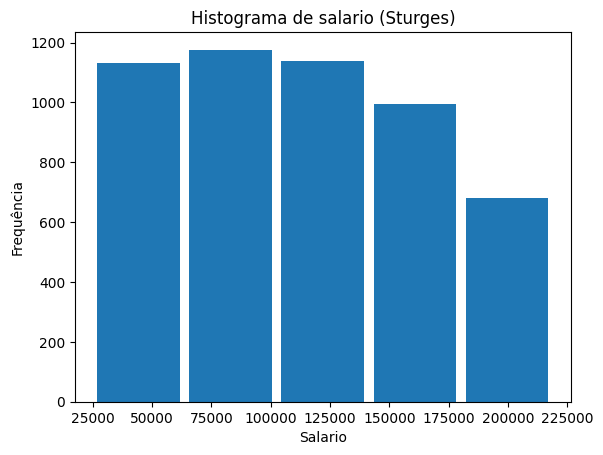

In [6]:
plt.hist(df["Age"], bins=5, rwidth=0.90)
plt.title("Histograma de Idade (Sturges)")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

plt.hist(df["Salary"], bins=5, rwidth=0.90)
plt.title("Histograma de salario (Sturges)")
plt.xlabel("Salario")
plt.ylabel("Frequência")
plt.show()


Crie o boxplot e o gráfico de violino para as coluna salário e verifique se ela possui algum outlier.

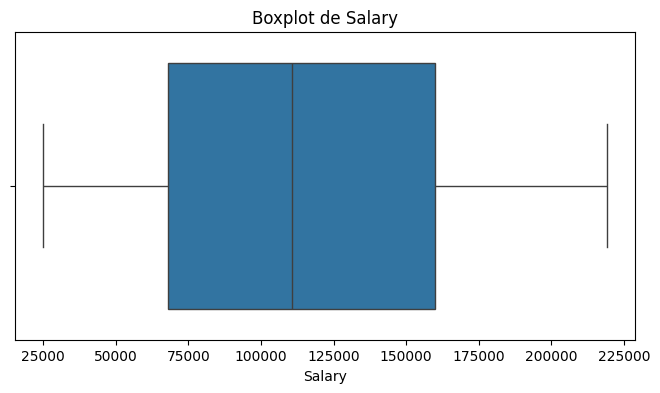

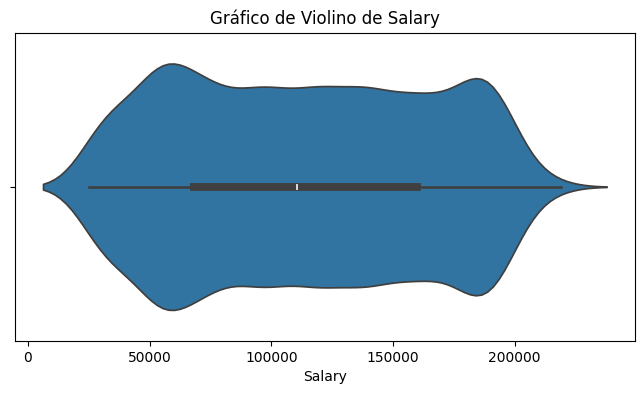

In [7]:
plt.figure(figsize=(8,4))
seaborn.boxplot(x=df['Salary'])
plt.title("Boxplot de Salary")
plt.show()

# Gráfico de violino
plt.figure(figsize=(8,4))
seaborn.violinplot(x=df['Salary'])
plt.title("Gráfico de Violino de Salary")
plt.show()

Calcule o coeficiente de correlação (pearson) entre todas as variáveis quantitativas e analise o seu resultado. Apresente também o mapa de calor.

Matriz de Correlação (Pearson):
                          Age  Years of Experience    Salary
Age                  1.000000             0.936098  0.738375
Years of Experience  0.936098             1.000000  0.811434
Salary               0.738375             0.811434  1.000000


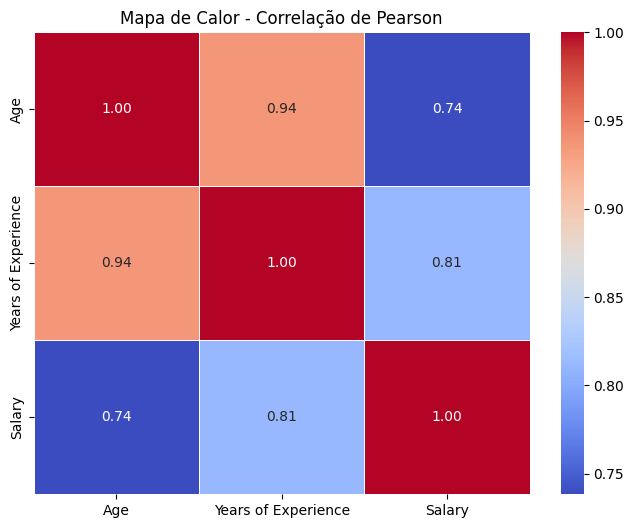

In [8]:
# Seleciona apenas variáveis numéricas
df_num = df.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação (Pearson é o padrão)
corr = df_num.corr(method='pearson')

print("Matriz de Correlação (Pearson):")
print(corr)

# Plotar o mapa de calor
plt.figure(figsize=(8,6))
seaborn.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor - Correlação de Pearson")
plt.show()

Elabore o diagrama de dispersão para mostras as relações abaixo e analise os resultados, comparando com os coeficientes de correlação calculados anteriormente.
Idade - Tempo de Experiência
Idade - Salário
Tempo de Experiência e Salário.

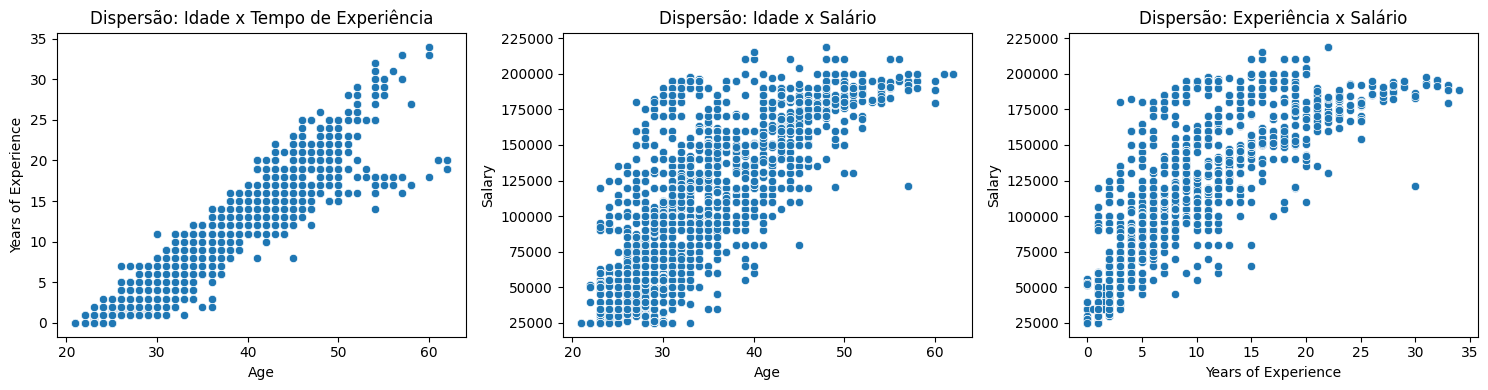

In [9]:
plt.figure(figsize=(15,4))

# Idade x Tempo de Experiência
plt.subplot(1,3,1)
seaborn.scatterplot(x=df['Age'], y=df['Years of Experience'])
plt.title("Dispersão: Idade x Tempo de Experiência")

# Idade x Salário
plt.subplot(1,3,2)
seaborn.scatterplot(x=df['Age'], y=df['Salary'])
plt.title("Dispersão: Idade x Salário")

# Tempo de Experiência x Salário
plt.subplot(1,3,3)
seaborn.scatterplot(x=df['Years of Experience'], y=df['Salary'])
plt.title("Dispersão: Experiência x Salário")

plt.tight_layout()
plt.show()

Apresente a quantidade de pessoas de cada nível educacional (tabela e gráfico de colunas).

Quantidade de pessoas por nível educacional:
Education Level
Bachelor's     2251
Master's       1480
PhD            1051
High School     336
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_16192\3848737174.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.countplot(x=df['Education Level'], order=edu_counts.index, palette="viridis")


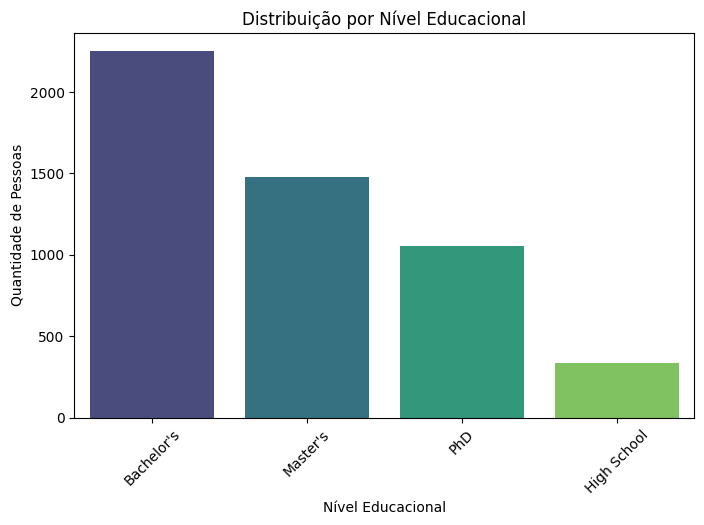

In [10]:
# Tabela de frequências
edu_counts = df['Education Level'].value_counts()

print("Quantidade de pessoas por nível educacional:")
print(edu_counts)

# Gráfico de colunas
plt.figure(figsize=(8,5))
seaborn.countplot(x=df['Education Level'], order=edu_counts.index, palette="viridis")
plt.title("Distribuição por Nível Educacional")
plt.xlabel("Nível Educacional")
plt.ylabel("Quantidade de Pessoas")
plt.xticks(rotation=45)
plt.show()

Apresente a quantidade de pessoas por por raça (apenas o gráfico de barras)

C:\Users\User\AppData\Local\Temp\ipykernel_16192\3228655057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.countplot(x=df['Race'], palette="pastel", order=df['Race'].value_counts().index)


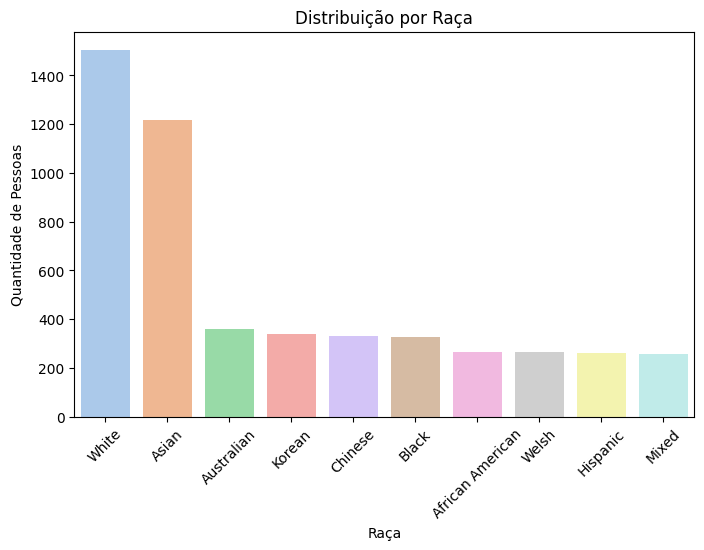

In [11]:
plt.figure(figsize=(8,5))
seaborn.countplot(x=df['Race'], palette="pastel", order=df['Race'].value_counts().index)
plt.title("Distribuição por Raça")
plt.xlabel("Raça")
plt.ylabel("Quantidade de Pessoas")
plt.xticks(rotation=45)
plt.show()

Apresente a quantidade de pessoas por país (apenas o gráfico de pizza)

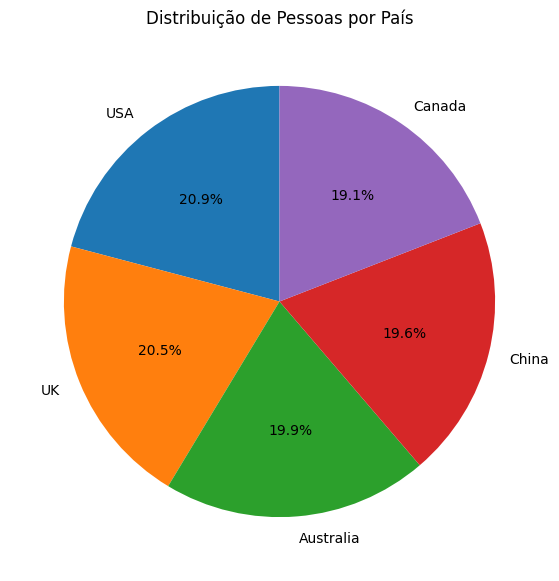

In [12]:
country_counts = df['Country'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribuição de Pessoas por País")
plt.show()

Apresente o salário médio agrupado por gênero (tabela e gráfico de barras)

Salário médio por gênero:
Gender
Female    106807.71
Male      119543.29
Name: Salary, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_16192\2335503476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=salary_by_gender.index, y=salary_by_gender.values, palette="Set2")


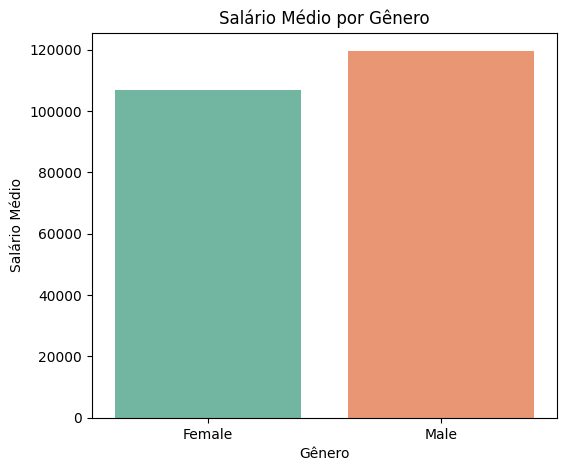

In [13]:
# Tabela com salário médio por gênero
salary_by_gender = df.groupby("Gender")["Salary"].mean().round(2)

print("Salário médio por gênero:")
print(salary_by_gender)

# Gráfico de barras
plt.figure(figsize=(6,5))
seaborn.barplot(x=salary_by_gender.index, y=salary_by_gender.values, palette="Set2")
plt.title("Salário Médio por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Salário Médio")
plt.show()

Apresente a variação do salário médio agrupado por gênero (gráfico de violino)

C:\Users\User\AppData\Local\Temp\ipykernel_16192\2418963322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.violinplot(x="Gender", y="Salary", data=df, palette="muted")


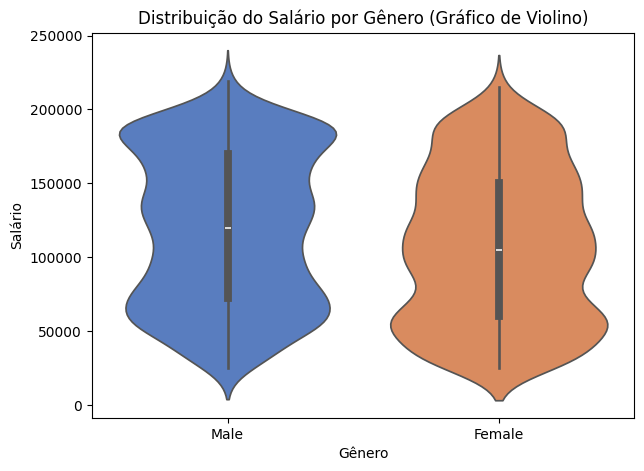

In [14]:
plt.figure(figsize=(7,5))
seaborn.violinplot(x="Gender", y="Salary", data=df, palette="muted")
plt.title("Distribuição do Salário por Gênero (Gráfico de Violino)")
plt.xlabel("Gênero")
plt.ylabel("Salário")
plt.show()

Apresente o salário médio agrupado por nível educacional e gênero (tabela) e os gráficos de colunas. Os primeiros gráficos devem apresentar o nível educacional no eixo x e o gênero como legenda de cores e as barras devem ser agrupadas. Outro gráfico deve apresentar o gênero no eixo x e o nível educacional na legenda de cores. Este gráfico deve apresentar as colunas empilhadas.

Salário médio por nível educacional e gênero:
Gender              Female       Male
Education Level                      
Bachelor's        86953.18   97329.49
High School       32175.45   40281.26
Master's         120300.49  138653.41
PhD              158836.94  164550.21


C:\Users\User\AppData\Local\Temp\ipykernel_16192\3846628495.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.barplot(x="Education Level", y="Salary", hue="Gender", data=df, ci=None, palette="Set2")


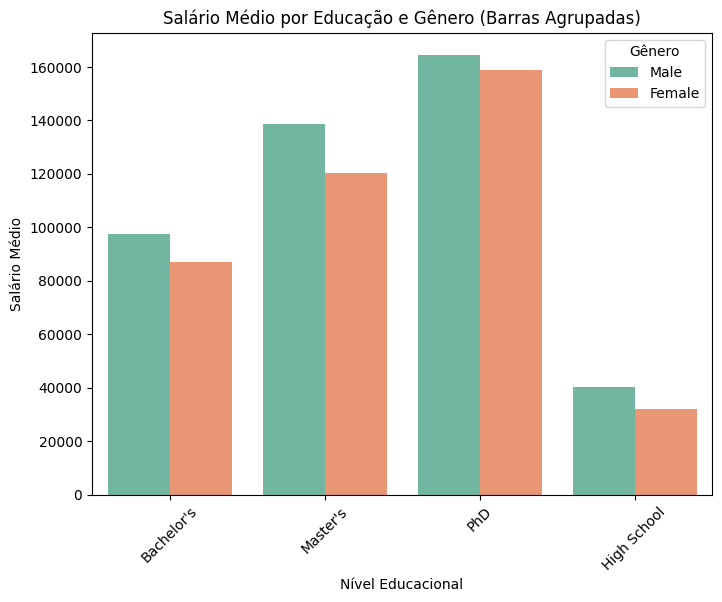

In [16]:
salary_edu_gender = df.groupby(["Education Level", "Gender"])["Salary"].mean().round(2).unstack()

print("Salário médio por nível educacional e gênero:")
print(salary_edu_gender)

# ---------- Gráfico 1: Barras agrupadas ----------
plt.figure(figsize=(8,6))
seaborn.barplot(x="Education Level", y="Salary", hue="Gender", data=df, ci=None, palette="Set2")
plt.title("Salário Médio por Educação e Gênero (Barras Agrupadas)")
plt.xlabel("Nível Educacional")
plt.ylabel("Salário Médio")
plt.xticks(rotation=45)
plt.legend(title="Gênero")
plt.show()

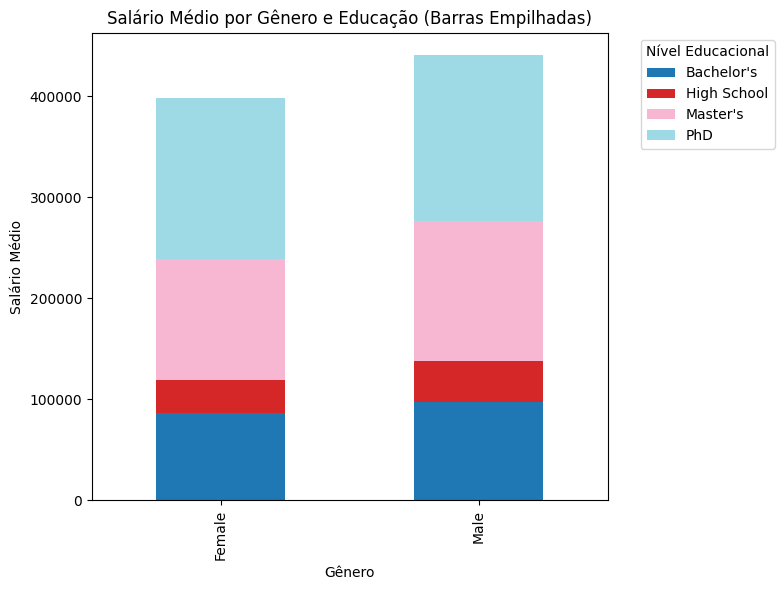

In [18]:
salary_stacked = df.groupby(["Gender", "Education Level"])["Salary"].mean().unstack()

salary_stacked.plot(kind="bar", stacked=True, figsize=(8,6), colormap="tab20")
plt.title("Salário Médio por Gênero e Educação (Barras Empilhadas)")
plt.xlabel("Gênero")
plt.ylabel("Salário Médio")
plt.legend(title="Nível Educacional", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()